In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 300

# Data Preparation

## Weekly rankings table

In [2]:
path_rankings = "/mnt/c/Users/heret/Downloads/rankings_1973-2017_csv.csv"
cols = ["player_slug", "week_title", "week_year", "rank_number", "ranking_points"]

weekly_rankings_df = pd.read_csv(path_rankings, usecols=cols)

In [3]:
path_rankings_2 = "/mnt/c/Users/heret/Downloads/rankings_2017-2021.csv"
cols = ["player_slug", "week_title", "week_year", "rank_number", "ranking_points"]

weekly_rankings_df_2 = pd.read_csv(path_rankings_2, usecols=cols, sep=";")
weekly_rankings_df_2 = weekly_rankings_df_2[weekly_rankings_df.columns]
weekly_rankings_df = pd.concat([weekly_rankings_df, weekly_rankings_df_2], ignore_index=True)

In [ ]:
weekly_rankings_df["week_title"] = pd.to_datetime(weekly_rankings_df["week_title"])
weekly_rankings_df["week_year"] = weekly_rankings_df["week_title"].dt.isocalendar().week
weekly_rankings_df["year"] = weekly_rankings_df["week_title"].dt.isocalendar().year.astype(str)
weekly_rankings_df = weekly_rankings_df.sort_values("week_title")
weekly_rankings_df["player_slug"] = weekly_rankings_df["player_slug"].str.replace("%20", "-")
weekly_rankings_df["player_slug"] = weekly_rankings_df["player_slug"].str.replace(".", "")

In [5]:
weekly_rankings_df.head()

,week_title,week_year,rank_number,ranking_points,player_slug,year
2694395,1973-08-23,34,43,0,vijay-amritraj,1973
2694419,1973-08-23,34,67,0,bob--carmichael,1973
2694418,1973-08-23,34,66,0,juan-gisbert-sr,1973
2694417,1973-08-23,34,65,0,gerald-battrick,1973
2694416,1973-08-23,34,64,0,charlie-pasarell,1973


### Yearly average rankings
Ranking system was changed in 2009 hence the spike and change in scale

<AxesSubplot:title={'center':'Mean Yearly Rankings - Top 500'}>

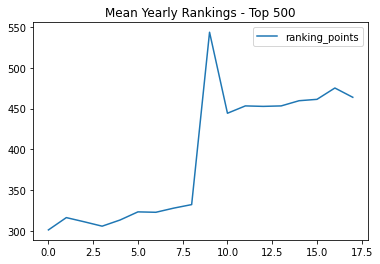

In [6]:
plot_agg = "mean"
top_n = 500
yearly_avg_ranking = weekly_rankings_df[(weekly_rankings_df["rank_number"] < top_n) & 
                                            (weekly_rankings_df["year"] < "2018") &
                                            (weekly_rankings_df["year"] >= "2000")].groupby(["year"], as_index=False).agg({"ranking_points": plot_agg}) 
yearly_avg_ranking.plot(title=f"Mean Yearly Rankings - Top {top_n}")

### Normalize points
Normalize all periods: 2000-2008, 2008-2009, 2009-20021 to have mean 0 and std 1

In [33]:
def mean_std(df, year_start, year_end, top_n=500):
    period_1 = df[(df["rank_number"] < top_n) & (df["year"] < str(year_end)) & (df["year"] >= str(year_start))]
    return period_1["ranking_points"].mean(), period_1["ranking_points"].std()

period_1_mean, period_1_std = mean_std(weekly_rankings_df, 2000, 2009)
period_2_mean, period_2_std = mean_std(weekly_rankings_df, 2010, 2018)
period_2009_mean, period_2009_std = mean_std(weekly_rankings_df, 2009, 2010)

In [61]:
#np.where vectorized, faster than apply or loc
weekly_rankings_df['ranking_points_normalized'] = np.where(weekly_rankings_df["year"] < "2009", (weekly_rankings_df["ranking_points"] - period_1_mean) / (period_1_std), 
                                     np.where(weekly_rankings_df["year"] == "2009", (weekly_rankings_df["ranking_points"] - period_2009_mean) / (period_2009_std),
                                              (weekly_rankings_df["ranking_points"] - period_2_mean) / (period_2_std)))

In [62]:
scale_x = weekly_rankings_df['ranking_points_normalized'].min()
scale_2 = 1000
weekly_rankings_df['ranking_points_normalized'] = (weekly_rankings_df['ranking_points_normalized'] + (-scale_x)) * scale_2

<AxesSubplot:title={'center':'Mean Yearly Rankings - Top 500 - Normalized'}>

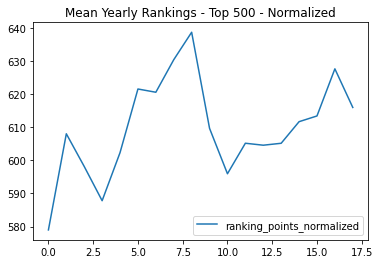

In [64]:
yearly_avg_ranking = weekly_rankings_df[(weekly_rankings_df["rank_number"] < top_n) & 
                                            (weekly_rankings_df["year"] < "2018") &
                                            (weekly_rankings_df["year"] >= "2000")].groupby(["year"], as_index=False).agg({"ranking_points_normalized": plot_agg})
yearly_avg_ranking.plot(title=f"Mean Yearly Rankings - Top {top_n} - Normalized")

## Grand Slam dates table

In [65]:
ao_dates = ["08.02.2021", "20.01.2020", "14.01.2019", "15.01.2018", "16.01.2017", "18.01.2016", "19.01.2015", "13.01.2014", "14.01.2013", "16.01.2012",
            "17.01.2011", "18.01.2010", "19.01.2009", "14.01.2008", "15.01.2007", "16.01.2006", "16.01.2005", "18.01.2004", "12.01.2003", "14.01.2002", "16.01.2001", "18.01.2000"]
rg_dates = ["30.05.2021", "27.09.2020", "26.05.2019", "27.05.2018", "28.05.2017", "22.05.2016", "24.05.2015", "25.05.2014", "26.05.2013", "27.05.2012",
            "22.05.2011", "23.05.2010", "24.05.2009", "25.05.2008", "27.05.2007", "28.05.2006", "23.05.2005", "24.05.2004", "26.05.2003", "27.05.2002", "29.05.2001", "30.05.2000"]
wimbledon_dates = ["28.06.2021", "01.07.2019", "02.07.2018", "03.07.2017", "27.06.2016", "29.06.2015", "23.06.2014", "24.06.2013", "25.06.2012", "20.06.2011",
                   "21.06.2010", "22.06.2009", "23.06.2008", "25.06.2007", "27.06.2006", "20.06.2005", "21.06.2004", "23.06.2003", "24.06.2002", "25.06.2001", "26.06.2000"]
uso_dates = ["31.08.2020", "26.08.2019", "27.08.2018", "28.08.2017", "29.08.2016", "31.08.2015", "25.08.2014", "26.08.2013", "27.08.2012", "29.08.2011",
             "30.08.2010", "31.08.2009", "25.08.2008", "27.08.2007", "28.08.2006", "29.08.2005", "30.08.2004", "25.08.2003", "26.08.2002", "22.08.2001", "29.08.2000"]

In [66]:
slams_cols = ["australian-open", "roland-garros", "wimbledon", "us-open"]
slam_dates_df = pd.DataFrame([ao_dates, rg_dates, wimbledon_dates, uso_dates]).T
slam_dates_df.columns = slams_cols

In [67]:
slam_dates_df = slam_dates_df.melt()
slam_dates_df.columns = ["slam", "start_date"]
slam_dates_df["start_date"] = pd.to_datetime(slam_dates_df["start_date"], format="%d.%m.%Y")
slam_dates_df = slam_dates_df.sort_values("start_date").dropna()

In [68]:
slam_dates_df.head()

,slam,start_date
21,australian-open,2000-01-18
43,roland-garros,2000-05-30
64,wimbledon,2000-06-26
86,us-open,2000-08-29
20,australian-open,2001-01-16


## Matches table

In [69]:
path_matches = "/mnt/c/Users/heret/Downloads/match_scores_1991-2021.csv"
cols = ["tourney_year_id", "tourney_slug", "winner_slug", "loser_slug", "tourney_round_name"]

matches_df = pd.read_csv(path_matches, usecols=cols, sep=";")
matches_df["year"] = matches_df["tourney_year_id"].str.split("-", expand=True)[0].astype(str)
matches_df = matches_df.drop("tourney_year_id", axis=1)
matches_df = matches_df.loc[matches_df['tourney_slug'].isin(slams_cols)]

In [70]:
matches_df.head()

,tourney_slug,tourney_round_name,winner_slug,loser_slug,year
124,australian-open,Finals,boris-becker,ivan-lendl,1991
125,australian-open,Semi-Finals,ivan-lendl,stefan-edberg,1991
126,australian-open,Semi-Finals,boris-becker,patrick-mcenroe,1991
127,australian-open,Quarter-Finals,stefan-edberg,jaime-yzaga,1991
128,australian-open,Quarter-Finals,boris-becker,guy-forget,1991


## Tournaments table

In [71]:
path_matches = "/mnt/c/Users/heret/Downloads/tournaments_1877-2021.csv"
cols = ["tourney_year", "tourney_slug", "singles_winner_player_slug"]
tournaments_df = pd.read_csv(path_matches, usecols=cols, sep=";")
tournaments_df["tourney_year"] = tournaments_df["tourney_year"].astype(str)

In [72]:
tournaments_df.head()

,tourney_year,tourney_slug,singles_winner_player_slug
0,1877,wimbledon,spencer-gore
1,1878,wimbledon,frank-hadow
2,1879,wimbledon,john-hartley
3,1880,wimbledon,john-hartley
4,1881,wimbledon,william-renshaw


## Filter matches by winner

In [73]:
matches_winner_df = pd.merge(tournaments_df, matches_df,
                             left_on=["tourney_slug", "tourney_year", "singles_winner_player_slug"],
                             right_on=["tourney_slug", "year", "winner_slug"],
                             how='inner')
matches_winner_df = matches_winner_df.drop("tourney_year", axis=1)

## Join Slams with Weekly rankings

In [74]:
start_slams_rankings = pd.merge_asof(weekly_rankings_df, slam_dates_df,
                  left_on='week_title', right_on="start_date",
                  tolerance=pd.Timedelta("7 days"), direction="backward")
start_slams_rankings = start_slams_rankings.dropna()

In [76]:
start_slams_rankings.head()

,week_title,week_year,rank_number,ranking_points,player_slug,year,ranking_points_normalized,ranking_points_normalized_2,slam,start_date
1011556,2000-01-24,4,524,37,gilles-elseneer,2000,71.120684,0.071121,australian-open,2000-01-18
1011557,2000-01-24,4,523,37,nikos-rovas,2000,71.120684,0.071121,australian-open,2000-01-18
1011558,2000-01-24,4,522,37,carlos-gomez-diaz,2000,71.120684,0.071121,australian-open,2000-01-18
1011559,2000-01-24,4,517,38,joan-jimenez-guerra,2000,73.042865,0.073043,australian-open,2000-01-18
1011560,2000-01-24,4,520,38,leonardo-silva,2000,73.042865,0.073043,australian-open,2000-01-18


## Join Rankings with Matches

Join winners data

In [77]:
matches_rankings_winner = pd.merge(matches_winner_df, start_slams_rankings, left_on=["tourney_slug", "year", "winner_slug"], right_on=["slam", "year", "player_slug"], how='left')
matches_rankings_winner = matches_rankings_winner.dropna()

In [78]:
cols = list(matches_winner_df.columns) + ["ranking_points", "rank_number", "ranking_points_normalized"]
matches_rankings_winner = matches_rankings_winner[cols]
matches_rankings_winner = matches_rankings_winner.rename(columns={"ranking_points": "ranking_points_winner", "rank_number": "rank_number_winner", "ranking_points_normalized": "ranking_points_norm_winner"})
matches_rankings_winner = matches_rankings_winner.drop_duplicates()

Join losers data

In [79]:
matches_ranked = pd.merge(matches_rankings_winner, start_slams_rankings, left_on=["tourney_slug", "year", "loser_slug"], right_on=["slam", "year", "player_slug"], how='left')
matches_ranked = matches_ranked.dropna()

In [80]:
cols = list(matches_rankings_winner.columns) + ["ranking_points", "rank_number", "ranking_points_normalized"]
matches_ranked = matches_ranked[cols]
matches_ranked = matches_ranked.rename(columns={"ranking_points": "ranking_points_loser", "rank_number": "rank_number_loser", "ranking_points_normalized": "ranking_points_norm_loser"})
matches_ranked = matches_ranked.drop_duplicates()

In [81]:
matches_ranked.head()

,tourney_slug,singles_winner_player_slug,tourney_round_name,winner_slug,loser_slug,year,ranking_points_winner,rank_number_winner,ranking_points_norm_winner,ranking_points_loser,rank_number_loser,ranking_points_norm_loser
0,australian-open,andre-agassi,Finals,andre-agassi,yevgeny-kafelnikov,2000,4135.0,1.0,7948.217011,2915,2,5603.156611
1,australian-open,andre-agassi,Semi-Finals,andre-agassi,pete-sampras,2000,4135.0,1.0,7948.217011,2419,3,4649.755006
2,australian-open,andre-agassi,Quarter-Finals,andre-agassi,hicham-arazi,2000,4135.0,1.0,7948.217011,800,41,1537.744524
3,australian-open,andre-agassi,Round of 16,andre-agassi,mark-philippoussis,2000,4135.0,1.0,7948.217011,1258,19,2418.103265
4,australian-open,andre-agassi,Round of 32,andre-agassi,mariano-zabaleta,2000,4135.0,1.0,7948.217011,936,33,1799.161094


----

## Stats per Round
We will later rank the Slam path based on how difficult each round match was

Checking points distribution per round

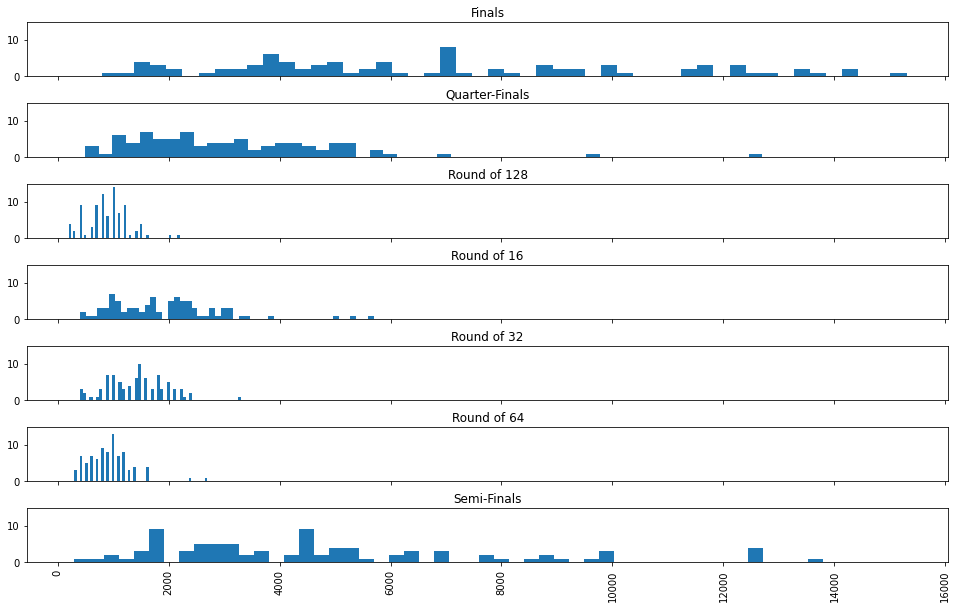

In [83]:
def custom_round(x, base=5):
    return int(base * round(float(x)/base))

matches_ranked["ranking_points_norm_loser"].apply(lambda x: custom_round(x, 100)).hist(by=matches_ranked['tourney_round_name'], bins=50, figsize=(16,10), sharex=True, sharey=True, layout=(7,1))
plt.show()

In [86]:
mean_ranks_rounds = matches_ranked.groupby(["tourney_round_name"], as_index=False).agg({"ranking_points_norm_loser": ["mean", "std"]})
mean_ranks_rounds.columns = ["tourney_round_name", "avg_ranking_round_norm_loser", "std_ranking_round_norm_loser"]
mean_ranks_rounds.head(10)

,tourney_round_name,avg_ranking_round_norm_loser,std_ranking_round_norm_loser
0,Finals,6669.908110,3759.480494
1,Quarter-Finals,3169.480598,1932.287795
2,Round of 128,896.583354,380.327932
3,Round of 16,1960.935992,1005.700446
4,Round of 32,1426.577294,530.534844
5,Round of 64,931.829530,414.868794
6,Semi-Finals,4792.697780,3119.979545


## Join Mean Round Rankings to Matches

In [87]:
matches_ranked_2 = pd.merge(matches_ranked, mean_ranks_rounds, on=["tourney_round_name"], how='left')

## Rank Slam Path


### Weight rounds by matches

In [88]:
rounds_weights = {"Finals": 1, "Semi-Finals": 1, "Quarter-Finals": 1, "Round of 16": 1/2,
                  "Round of 32": 1/2, "Round of 64":1/4, "Round of 128": 1/4}

matches_ranked_2["rounds_weights"] = matches_ranked_2["tourney_round_name"].apply(lambda x: rounds_weights[x])

### Difference to mean

In [89]:
matches_ranked_2["diff_rank_mean"] = matches_ranked_2["ranking_points_norm_loser"] / matches_ranked_2["avg_ranking_round_norm_loser"]
matches_ranked_2["diff_rank_mean_weighted"] = matches_ranked_2["diff_rank_mean"] * matches_ranked_2["rounds_weights"]
mean_ranks = matches_ranked_2.groupby(["year", "tourney_slug", "winner_slug"], as_index=False).agg({"diff_rank_mean_weighted": "mean"})
mean_ranks["year"] = mean_ranks.year.astype(int)

### Scale to mean 1 for interpretation

In [90]:
mean_difficulty = mean_ranks["diff_rank_mean_weighted"].mean()
mean_ranks["diff_rank_mean_weighted"] = mean_ranks["diff_rank_mean_weighted"] / mean_difficulty

## Plots

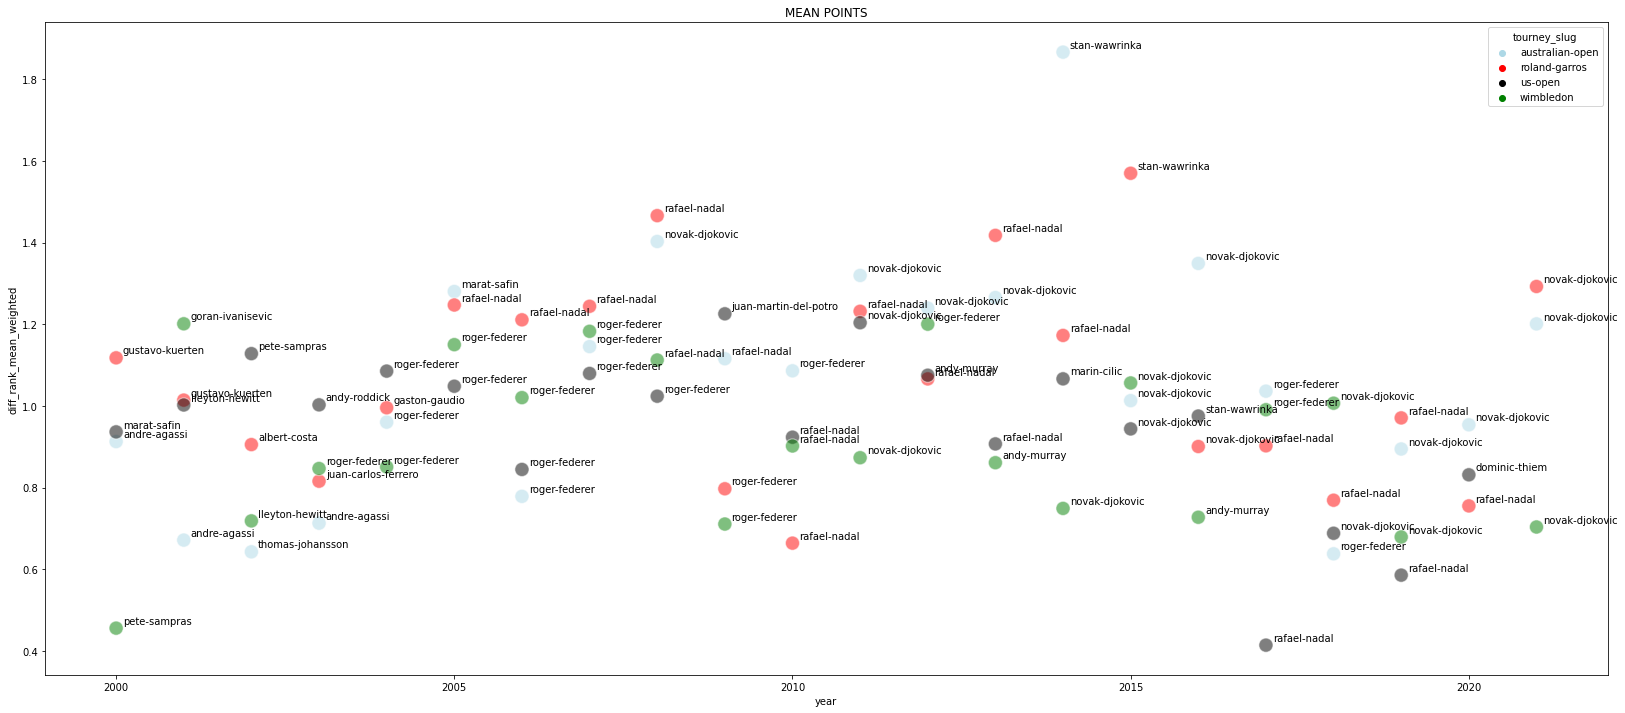

In [91]:
color_dict = dict({'australian-open':'lightblue',
                  'roland-garros':'red',
                  'wimbledon': 'green',
                  'us-open': 'black'})

plt.figure(figsize=(28,12))
sns.scatterplot(data=mean_ranks, x="year", y="diff_rank_mean_weighted", hue="tourney_slug", palette=color_dict, s=200, alpha=0.5)
plt.title("MEAN POINTS")
for i in range(0, mean_ranks.shape[0]):
    plt.text(mean_ranks["year"][i] + 0.1 , mean_ranks["diff_rank_mean_weighted"][i] + 0.01, mean_ranks["winner_slug"][i])

In [92]:
matches_ranked_2.to_csv("./slam_winners_ranked00-21.csv", index=False)